In [8]:
#@title gradient descent
"""
prediction: manually
gradient computation: manually
loss computation: manually
parameter updates: manually
"""

import numpy as np


X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted - y).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X, Y, y_pred)
    
    # update weight
    w -= learning_rate * dw
    
    if epoch % 2 == 0:
        print(f"epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050331
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [3]:
#@title training pipeline
"""
prediction: manually
gradient computation: autograd
loss computation: manually
parameter updates: manually
"""

import torch


X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return((y_predicted - y)**2).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weight
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [19]:
#@title linear regression
"""
prediction: pytorch model
gradient computation: autograd
loss computation: pytorch loss
parameter updates: pytorch optimizer
"""

# 1. Design model(input, output size, forward pass)
# 2. Construct loss and optimizer
# 3. Training loop
#    - forward pass: compute prediction and loss
#    - backward pass: gradients
#    - update weights

import torch
import torch.nn as nn


X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}")
print("")

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)
    
print(f"Prediction before training: f(5) = {model(X_test).item():.3f}")

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    # update weight
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f"epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {model(X_test).item():.3f}")

n_samplers: 4
n_features: 1

Prediction before training: f(5) = 0.752
epoch 1: w = 0.252, loss = 22.89918518
epoch 11: w = 1.355, loss = 0.86191410
epoch 21: w = 1.543, loss = 0.27607319
epoch 31: w = 1.583, loss = 0.24614540
epoch 41: w = 1.600, loss = 0.23145974
epoch 51: w = 1.612, loss = 0.21797828
epoch 61: w = 1.624, loss = 0.20529068
epoch 71: w = 1.635, loss = 0.19334158
epoch 81: w = 1.646, loss = 0.18208808
epoch 91: w = 1.656, loss = 0.17148960
Prediction after training: f(5) = 9.311


epoch: 9, loss: 4475.5918
epoch: 19, loss: 3336.2056
epoch: 29, loss: 2512.1689
epoch: 39, loss: 1915.5463
epoch: 49, loss: 1483.1375
epoch: 59, loss: 1169.4478
epoch: 69, loss: 941.6843
epoch: 79, loss: 776.1774
epoch: 89, loss: 655.8210
epoch: 99, loss: 568.2388


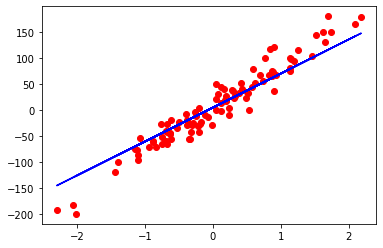

In [13]:
#@title linear regression

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


# 0. Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, 
                                            n_features=1, noise=20,
                                            random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape


# 1. Design model(input, output size, forward pass)
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)


# 2. Construct loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# 3. Training loop
num_epochs = 100
for epoch in range(num_epochs):
   
    # forward pass: compute prediction & loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass: gradients
    loss.backward()
    
    # update weights
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch}, loss: {loss.item():.4f}")
        
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

In [2]:
#@title logistic regression

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 0. Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1234)
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


# 1. Design model(input, output size, forward pass)
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        
        # define layers 
        self.linear =  nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)


# 2. Construct loss and optimizer
learning_rate =  0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# 3. Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass: compute prediction & loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
        
    # backward pass: gradients
    loss.backward()
    
    # update weights
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f"epoch {epoch}: loss = {loss.item():.4f}")
        
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f"accuracy = {acc:.4f}")

epoch 9: loss = 0.5626
epoch 19: loss = 0.4792
epoch 29: loss = 0.4226
epoch 39: loss = 0.3813
epoch 49: loss = 0.3498
epoch 59: loss = 0.3247
epoch 69: loss = 0.3042
epoch 79: loss = 0.2870
epoch 89: loss = 0.2723
epoch 99: loss = 0.2596
accuracy = 0.9123
